## Importing the required packages

In [11]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [48]:
## Opening the image and converting it into gray-scale
image = np.array(Image.open('cameraman.tif').convert('L'))

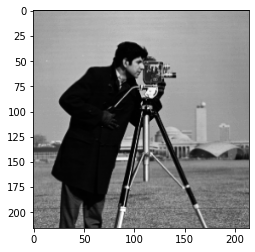

In [50]:
## Displatying the image
plt.imshow(image, cmap='gray')

In [55]:
def perform_convoltion(image, filter):
    """
    Function that convolves a filter over an image

    @params
    image: numpy array that contains the input image

    @returns
    output: numpy array that contains the output image
    """

    #Creating an empty array that will store the output image
    output = np.zeros(image.shape)

    filter_height = filter.shape[0]
    filter_width  = filter.shape[1]
    
    ## Iterating over the image
    for i in range(image.shape[0] - filter_height - 1):        
        for j in range(image.shape[1] - filter_width - 1):

            ## Slicing the image to get the part that needs to be convolved
            image_slice = np.array(image[i : i+filter_height, j : j+filter_width])

            ## Performing the convolution
            output[i, j] = np.sum(np.multiply(image_slice ,filter))
            
    return output   

In [56]:
## Defining the Sobel operation filters

S_x  = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
])

S_y =  np.array([
    [-1, -2, -1], 
    [0 ,  0,  0], 
    [1 ,  2,  1]
])

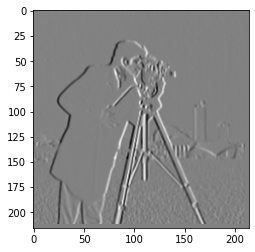

In [63]:
## Calclating the horizontal edges in the image
G_x = perform_convoltion(image, S_x)

## Displaying the horizontal edges
plt.imshow(G_x, cmap='gray')

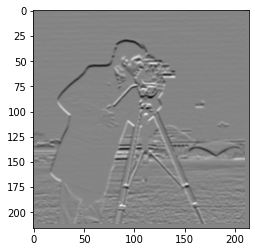

In [64]:
## Calclating the vertical edges in the image
G_y = perform_convoltion(image, S_y)

## Displaying the vertical edges
plt.imshow(G_y, cmap='gray')

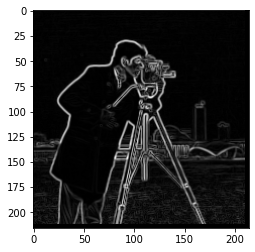

In [68]:
## Calculaing the gradient magnitude
G = np.sqrt(np.square(G_x) + np.square(G_y))

## Displaying gradients
plt.imshow(G, cmap='gray')

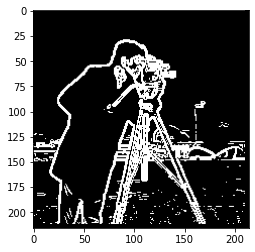

In [75]:
## Perfroming thresholding on the gradient image
theshold = 128
G_thresh = G > theshold

## Displaying the segmented gradients
plt.imshow(G_thresh, cmap='gray')